In [8]:
import jax
import jax.numpy as jnp
import jax_cosmo as jc
from cosmo_jnp import cosmo, data, pantheon

## Introduce a cosmology

1. Jax cosmo. n_s and sigma8 are dummy values. They should have no effect.
2. Cosmo class from cosmo_jnp module. Data is to be loaded first.

In [9]:
cosmo_jax = jc.Cosmology(h=0.7, Omega_c = 0.25, Omega_b=0.05, w0=-1.1, wa=0.4, Omega_k=0, n_s=0, sigma8=0)
p = pantheon('pantheon.txt', 'pantheon_covsys.txt')
cosmo = cosmo(0.7, p.redshift1)

convert the redhift values to $a$ values

In [10]:
a_panth = jc.utils.z2a(p.redshift1)

Determing the distance modulus from the luminosity distance

In [15]:
%%timeit
d_jc = jc.background.angular_diameter_distance(cosmo_jax, a_panth)/a_panth**2
mu_jc = 5*jnp.log10(d_jc) + 25

/home/jakob/.local/lib/python3.10/site-packages/jax/_src/numpy/lax_numpy.py:4459: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  lax_internal._check_user_dtype_supported(dtype, "astype")


86.1 ms ± 7.03 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [16]:
%%timeit
mu_co=cosmo.dist_mod(0.3, -1.1, 0.4)

17.1 ms ± 1.08 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


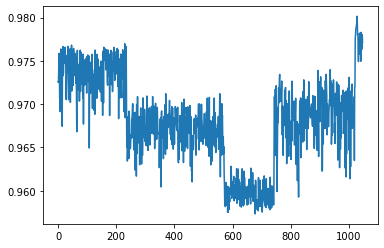

In [17]:
d_jc = jc.background.angular_diameter_distance(cosmo_jax, a_panth)/a_panth**2
mu_jc = 5*jnp.log10(d_jc) + 25
mu_co=cosmo.dist_mod(0.3, -1.1, 0.4)


import matplotlib.pyplot as plt
plt.plot(mu_jc/mu_co)